<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 3</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

# COMIENZA EJEMPLO

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings



from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

# **MODELO MA**

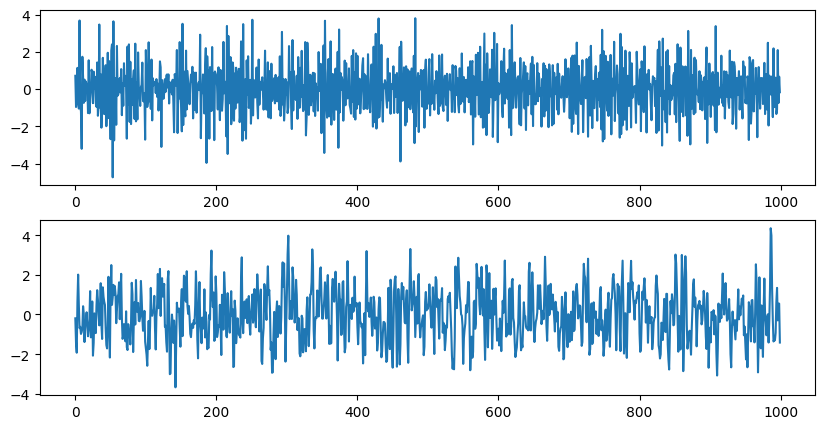

In [ ]:
# Grafico 1: MA parametro: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
np.random.seed(2023)
datos_simulados_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(datos_simulados_1);

# Grafico 2: MA parametro: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
datos_simulados_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(datos_simulados_2);

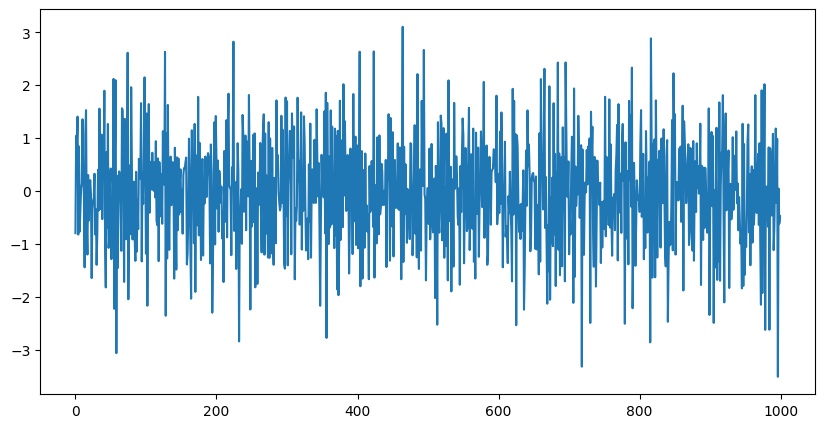

In [ ]:
# Grafico 3: MA parametro: -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
datos_simulados_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(datos_simulados_3);

NameError: ignored

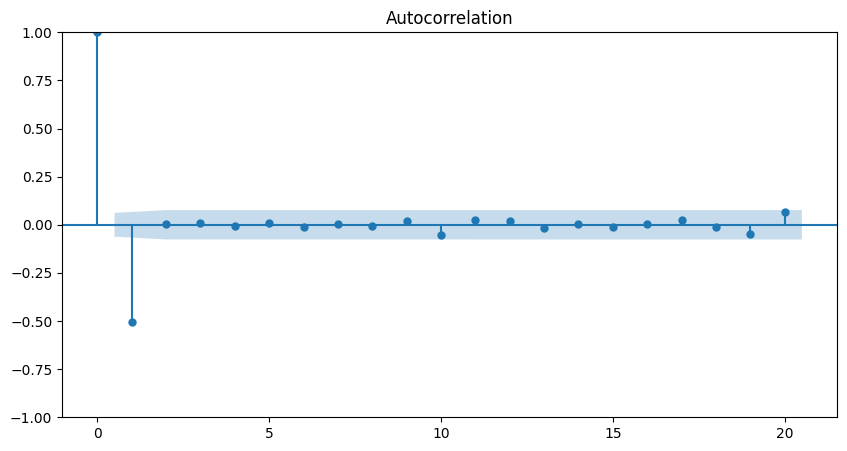

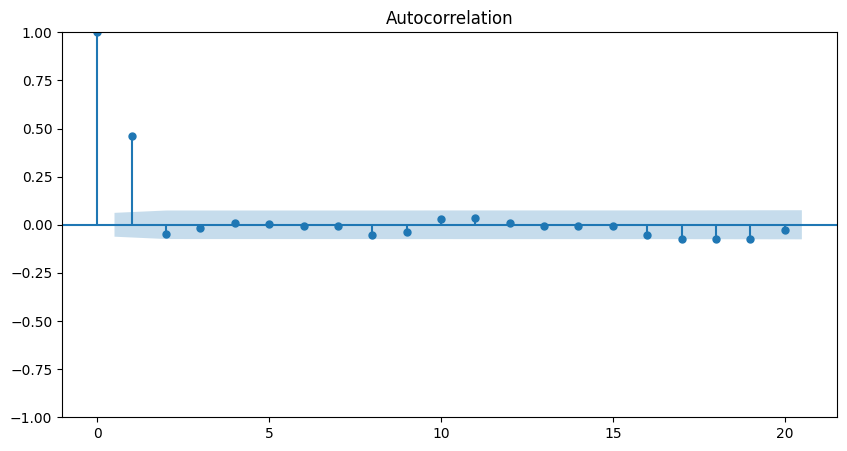

In [ ]:
# grafico ACF de los datos simulados 1:
plot_acf(datos_simulados_1, lags=20);

# grafico ACF de los datos simulados 2:
plot_acf(datos_simulados_2, lags=20);

# grafico ACF de los datos simulados 3:
plot_acf(datos_simulados_3, lags=20);

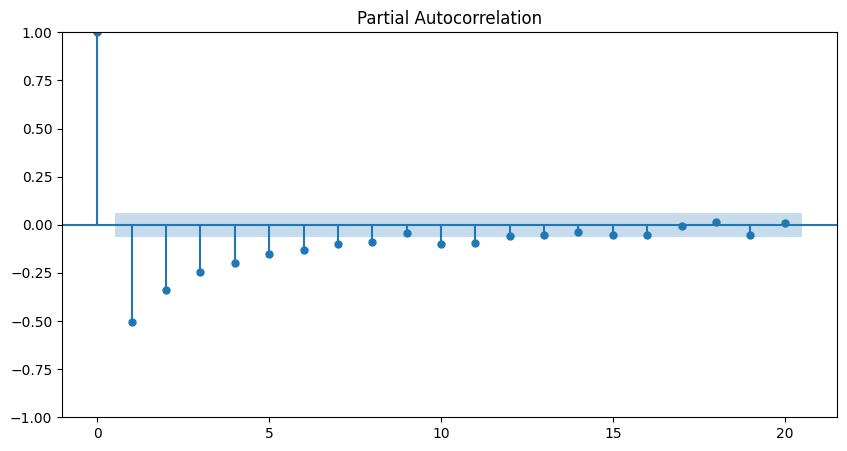

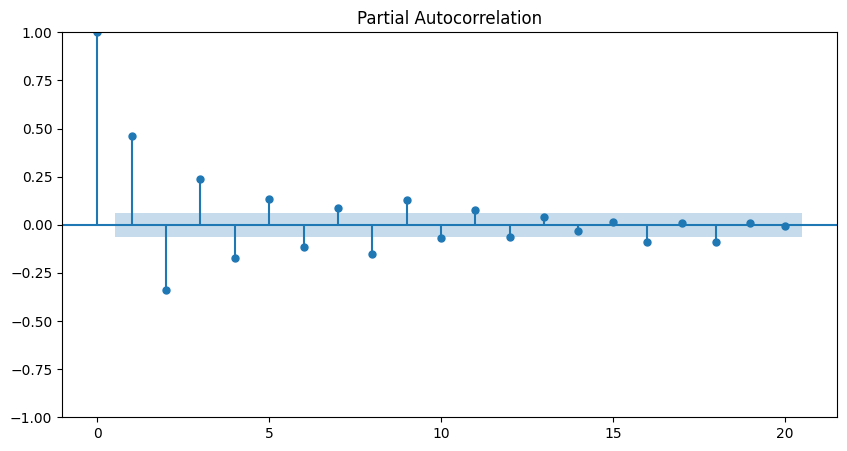

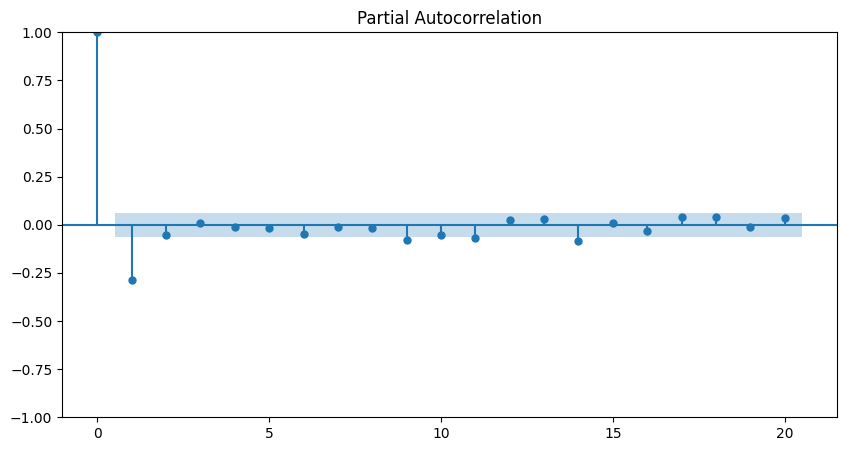

In [ ]:
# grafico PACF de los datos simulados 1:
plot_pacf(datos_simulados_1, lags=20);

# grafico PACF de los datos simulados 2:
plot_pacf(datos_simulados_2, lags=20);

# grafico PACF de los datos simulados 3:
plot_pacf(datos_simulados_3, lags=20);

*Aqui* vemos el modelo MA(1) de los simulados 1:

In [ ]:
modelo1 = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1418.199
Date:                Sat, 11 Nov 2023   AIC                           2842.399
Time:                        15:43:10   BIC                           2857.122
Sample:                             0   HQIC                          2847.995
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.003     -0.132      0.895      -0.007       0.006
ma.L1         -0.8999      0.015    -60.800      0.000      -0.929      -0.871
sigma2         0.9969      0.048     20.924      0.000       0.903       1.090
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.57   Prob(JB):                         0.27
Heteroskedasticity (H):               0.88   Skew:                            -0.03
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AUTO-ARIMA por libreria

In [ ]:
stepwise_fit = auto_arima(datos_simulados_1, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2847.823, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3449.883, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3156.730, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2842.399, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3447.883, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2844.024, Time=0.44 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2844.019, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2846.398, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2840.416, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2842.040, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2842.036, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3154.730, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2844.415, Time=0.16 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 3.649 seconds


AUTO-ARIMA manual

In [ ]:
# Determinamos los parametros p, d y q
p = d = range(0, 3)
q = range(2)


# Combinacion de los diferentes pamatros para luego probar
pdq = list(itertools.product(p, d, q))


# Inicializa para el loop, con el primer modelo que genera

loopinicial = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,0))
loopinicialresult = loopinicial.fit()
RESULTADOAIC = loopinicialresult.aic

orden=[]

# Iniciamos el loop
for param in pdq:

  mod = ARIMA(datos_simulados_1, order=(param))
  results = mod.fit()

  if results.aic < RESULTADOAIC:
    RESULTADOAIC = results.aic
    orden = param

print(f"El mejor modelo es un ARIMA{orden}, arrojo el menor AIC de = {RESULTADOAIC  } ")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


El mejor modelo es un ARIMA(0, 0, 1), arrojo el menor AIC de = 2842.3988914076185 


# TRABAJAMOS CON LOS DATOS SIMULADOS DEL CASO 2

*Aqui* vemos el modelo MA(1) de los simulados 2:

In [ ]:
modelo2_A = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,1))
resultado2A = modelo2_A.fit()

resultado2A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1380.759
Date:                Sat, 11 Nov 2023   AIC                           2767.518
Time:                        14:18:15   BIC                           2782.242
Sample:                             0   HQIC                          2773.114
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0152      0.058     -0.262      0.793      -0.128       0.098
ma.L1          0.9000      0.014     66.085      0.000       0.873       0.927
sigma2         0.9249      0.042     21.858      0.000       0.842       1.008
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.19   Prob(JB):                         0.77
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1,12 y 13 de los simulados 2:

In [ ]:
modelo2_B = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,1,1)))
resultado2B = modelo2_B.fit()

resultado2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 12, 13])   Log Likelihood               -1380.629
Date:                      Sat, 11 Nov 2023   AIC                           2771.258
Time:                              14:18:29   BIC                           2795.797
Sample:                                   0   HQIC                          2780.585
                                     - 1000                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0153      0.059     -0.260      0.795      -0.131       0.100
ma.L1          0.9007      0.014     62.379      0.000       0.872       0.929
ma.L12         0.0167      0.032      0.515      0.606      -0.047       0.080
ma.L13         0.0165      0.032      0.520      0.603      -0.046       0.079
sigma2         0.9247      0.042     21.772      0.000       0.841       1.008
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.18   Prob(JB):                         0.76
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1 y 13 de los simulados 2:

In [ ]:
modelo2_C = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,0,1)))
resultado2C = modelo2_C.fit()

resultado2C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 13])   Log Likelihood               -1380.749
Date:                  Sat, 11 Nov 2023   AIC                           2769.498
Time:                          14:20:44   BIC                           2789.129
Sample:                               0   HQIC                          2776.959
                                 - 1000                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0152      0.058     -0.262      0.793      -0.129       0.098
ma.L1          0.8996      0.014     63.219      0.000       0.872       0.927
ma.L13         0.0020      0.014      0.145      0.885      -0.025       0.029
sigma2         0.9249      0.042     21.794      0.000       0.842       1.008
===================================================================================
Ljung-Box (L1) (Q):                   1.69   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.19   Prob(JB):                         0.76
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3314.897, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3074.938, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2767.518, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3313.026, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2767.330, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2769.069, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2769.395, Time=0.98 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2767.251, Time=0.71 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2769.021, Time=0.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2770.940, Time=0.77 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2765.326, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2765.587, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2767.480, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : 

In [ ]:
AIC= [resultado2A.aic,resultado2B.aic,resultado2C.aic]
BIC= [resultado2A.bic,resultado2B.bic,resultado2C.aic]
HQIC= [resultado2A.hqic,resultado2B.hqic,resultado2C.aic]

In [ ]:
MODELOS = ('Lag 1', 'Lags 1, 12 y 13', 'Lags 1 y 13')
resumen2 = pd.DataFrame({'AIC':AIC, 'BIC': BIC,'HQIC':HQIC}, index=MODELOS)
resumen2.index.name = 'MODELOS'

resumen2.round(4)

,AIC,BIC,HQIC
MODELOS,,,
Lag 1,2767.5184,2782.2416,2773.1143
"Lags 1, 12 y 13",2771.2582,2795.7970,2780.5846
Lags 1 y 13,2769.4979,2769.4979,2769.4979


*Aqui* vemos el modelo MA(1) de los simulados 3:

In [ ]:
modelo3 = sm.tsa.arima.ARIMA(datos_simulados_3, order=(0,0,1))
resultado3 = modelo3.fit()

resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1402.918
Date:                Sat, 11 Nov 2023   AIC                           2811.835
Time:                        14:21:48   BIC                           2826.558
Sample:                             0   HQIC                          2817.431
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0267      0.022     -1.204      0.229      -0.070       0.017
ma.L1         -0.2894      0.031     -9.459      0.000      -0.349      -0.229
sigma2         0.9684      0.043     22.307      0.000       0.883       1.053
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.74   Prob(JB):                         0.99
Heteroskedasticity (H):               1.12   Skew:                            -0.01
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_3, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2816.005, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2895.692, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2813.362, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2811.835, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2894.385, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2812.544, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2812.474, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2814.474, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2811.291, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2811.913, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2811.821, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2812.578, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2813.819, Time=0.21 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.897 seconds


FIN DEL CODIGO - GRACIAS